## 1. Necessary imports

In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import IPython.display as display

from PIL import Image
from collections import Counter

## 2. Visualizations for classification task

In [2]:
DATASET_PATH = "animal_data"

classes = sorted(os.listdir(DATASET_PATH))
class_counts = {cls: len(os.listdir(os.path.join(DATASET_PATH, cls))) for cls in classes}

In [3]:
df_classes = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Count'])
df_classes = df_classes.sort_values(by='Count', ascending=False)

print(f"Total classes: {len(classes)}")
print(f"Total images: {sum(df_classes['Count'])}")
display.display(df_classes)

Total classes: 15
Total images: 1944


,Count
Bird,137
Zebra,137
Panda,135
Elephant,133
Cow,131
Lion,131
Horse,130
Dolphin,129
Giraffe,129
Tiger,129


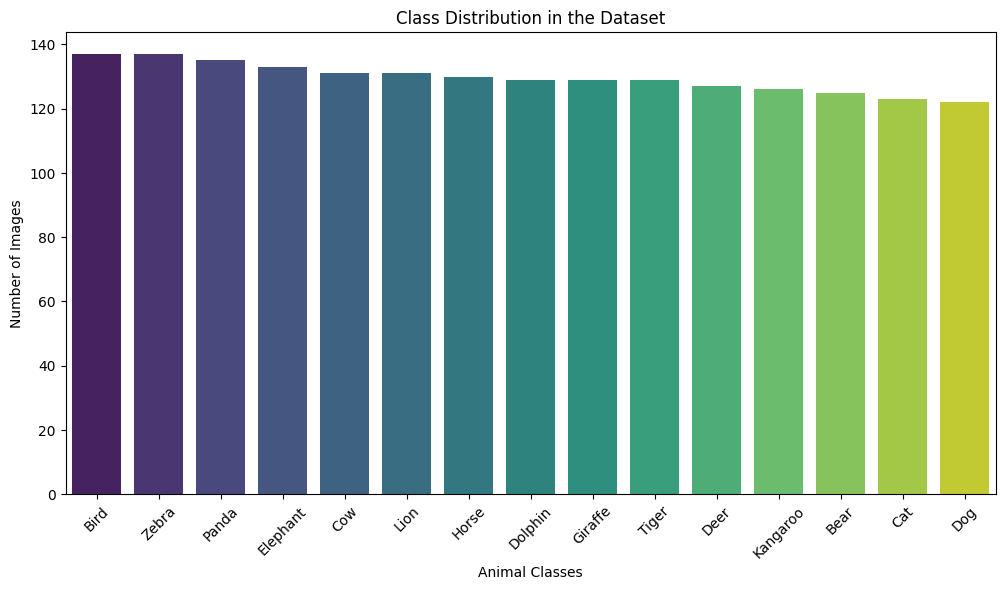

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_classes.index, y=df_classes['Count'], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Animal Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in the Dataset")
plt.show()

As we can see our dataset is balanced, since the number of instances for each of classes is equally distributed


Class: Bear


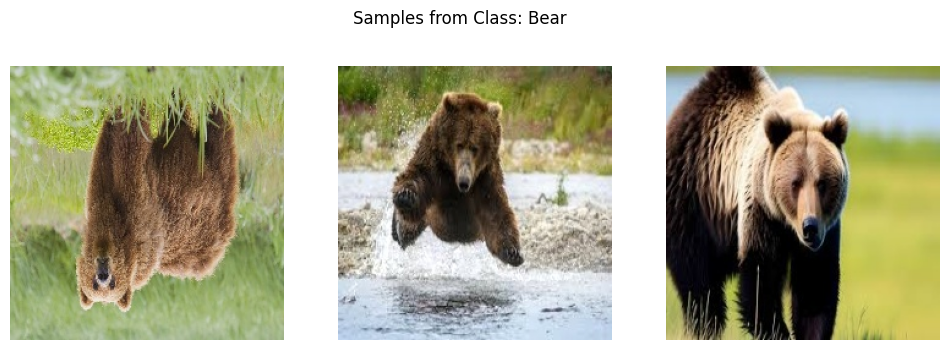


Class: Deer


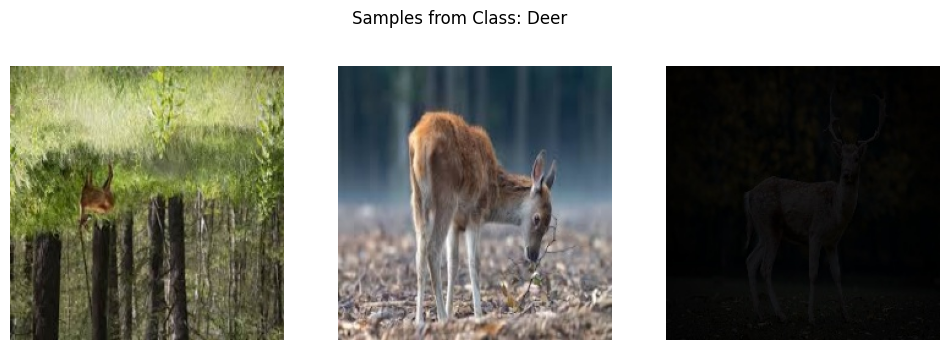


Class: Lion


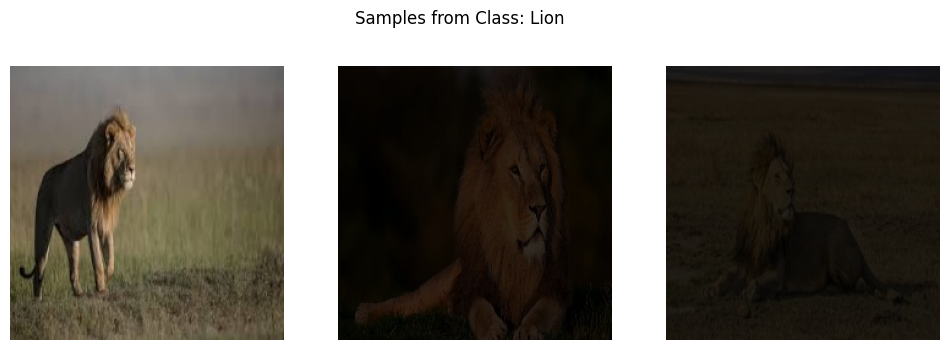


Class: Cat


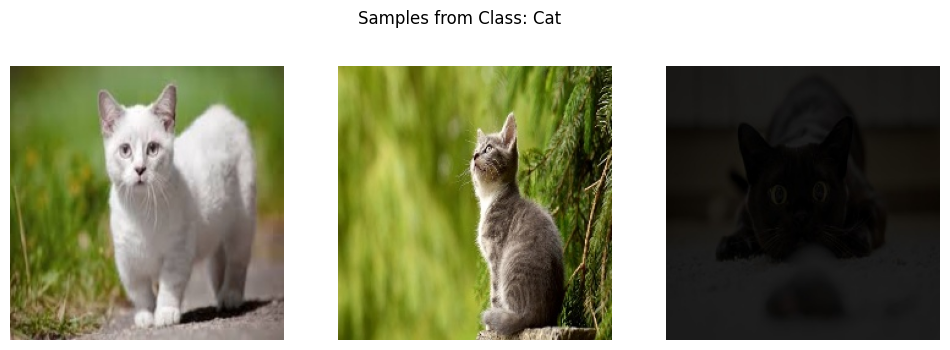


Class: Elephant


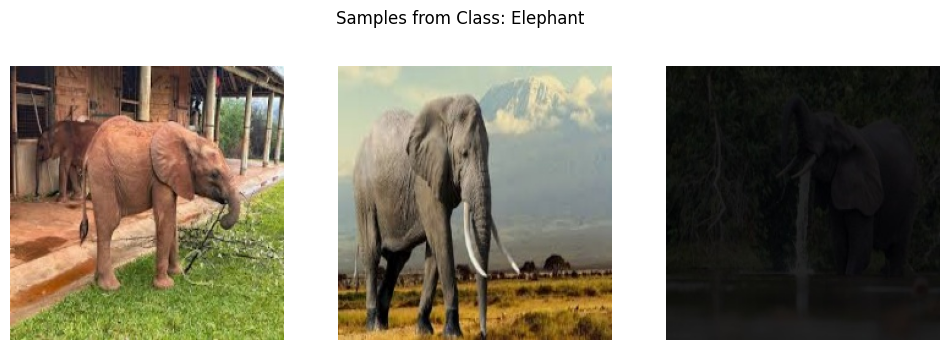

In [37]:
import random
random.seed(43)
num_samples = 3
selected_classes = random.sample(classes, 5)

for cls in selected_classes:
    print(f"\nClass: {cls}")
    cls_path = os.path.join(DATASET_PATH, cls)
    images = os.listdir(cls_path)
    sample_images = random.sample(images, num_samples)

    fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(cls_path, img_name)
        with Image.open(img_path) as img:
            axes[i].imshow(img)
            axes[i].axis("off")
    plt.suptitle(f"Samples from Class: {cls}")
    plt.show()

As we can see from above samples visualizations, the dataset is already augmented and contains different rotations transformations etc.

In [8]:
image_sizes = []
image_formats = []

for cls in classes:
    cls_path = os.path.join(DATASET_PATH, cls)
    image_files = os.listdir(cls_path)

    for img_file in image_files:
        img_path = os.path.join(cls_path, img_file)
        try:
            img = Image.open(img_path)
            image_sizes.append(img.size)
            image_formats.append(img.format)
        except:
            print(f"Corrupted image: {img_path}")

size_counts = Counter(image_sizes)
format_counts = Counter(image_formats)

print("Image Sizes Distribution:", size_counts)
print("Image Formats Distribution:", format_counts)

Image Sizes Distribution: Counter({(224, 224): 1944})
Image Formats Distribution: Counter({'JPEG': 1944})


In [9]:
def find_corrupted_images(dataset_path, classes):
    corrupted_images = []

    for cls in classes:
        cls_path = os.path.join(dataset_path, cls)
        image_files = os.listdir(cls_path)

        for img_file in image_files:
            img_path = os.path.join(cls_path, img_file)
            try:
                img = Image.open(img_path)
                img.verify()
            except:
                corrupted_images.append(img_path)

    return corrupted_images

corrupted_images = find_corrupted_images(DATASET_PATH, classes)


In [10]:
if corrupted_images:
    print(f"Found {len(corrupted_images)} corrupted images.")
    print(corrupted_images)
else:
    print("No corrupted images found.")

No corrupted images found.
